In [0]:
import pandas as pd
import numpy as np
import torch 
from torch import nn,optim


In [2]:
from google.colab import files
uploaded=files.upload()
import io

train=pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

Saving train.csv to train.csv


In [4]:
uploaded=files.upload()
test=pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

Saving test.csv to test.csv


In [0]:
batch =128
lr=0.001
epoch=10


In [6]:
train.head(6)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head(6)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train=train['label']
x_train=train.drop('label',axis=1)
y_train=pd.get_dummies(y_train) #원핫인코딩
y_train=y_train.to_numpy()
x_train=x_train.to_numpy() #둘다 numpy형태로 저장


In [9]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
y_train

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

x_train=scaler.fit_transform(x_train)

x_test=test.to_numpy()
x_test=scaler.fit_transform(x_test)




In [0]:
def get_acc(pred,answer):
  correct=0
  for p,a in zip(pred,answer):
    pv,pi=p.max(0)
    av,ai=a.max(0)
    if pi==ai:
      correct+=1
  return correct/len(pred)

In [0]:
class MNISTModel(nn.Module):
  def __init__(self):
    super(MNISTModel,self).__init__()
    self.fc1=nn.Linear(784,512)
    self.fc2=nn.Linear(512,512)
    self.fc3=nn.Linear(512,10)
   

  def forward(self,x):
    x1=torch.relu(self.fc1(x))
    x2=torch.relu(self.fc2(x1))
    x3=self.fc3(x2)
    return x3
      
    

In [0]:
#Train
#model 셋팅
def train(x_train,y_train,batch,Ir,epoch):
  model=MNISTModel()
  model.train()

  loss_function=nn.MSELoss(reduction="mean")
  optimizer=optim.Adam(model.parameters(),lr=lr)

  #data 처리
  x=torch.from_numpy(x_train).float()
  y=torch.from_numpy(y_train).float()

  data_loader=torch.utils.data.DataLoader(list(zip(x,y)),batch,shuffle=True)

  epoch_loss=[]
  epoch_acc=[]

  for e in range(epoch):
    total_loss=0
    total_acc=0
    for data in data_loader:
      x_data,y_data=data

      #forward 문제풀이
      pred=model(x_data)

      #backward 채점 및 학습
      loss=loss_function(pred,y_data)
      optimizer.zero_grad()
      loss.backward()

      #update 학습 반영
      optimizer.step()

      total_loss +=loss.item()
      total_acc+=get_acc(pred,y_data)

    epoch_loss.append(total_loss/len(data_loader))
    epoch_acc.append(total_acc/len(data_loader))
    print("Epoch [%d Loss: %.3f\tAcc: %.3f" % (e+1,epoch_loss[e],epoch_acc[e]))
  return model,epoch_loss,epoch_acc
  



In [0]:
def test(model,x_test,batch):
  model.eval()

  x=torch.from_numpy(x_test).float()
  data_loader=torch.utils.data.DataLoader(x,batch,shuffle=False)

  preds=[]
  for data in data_loader:
    pred=model(data)
    for p in pred:
      pv,pi=p.max(0)
      preds.append(pi.item())
  return preds

In [24]:
model,epoch_loss,epoch_acc=train(x_train,y_train,batch,lr,epoch)
test(model,x_test,batch)

Epoch [1 Loss: 0.015	Acc: 0.938
Epoch [2 Loss: 0.006	Acc: 0.979
Epoch [3 Loss: 0.004	Acc: 0.988
Epoch [4 Loss: 0.002	Acc: 0.993
Epoch [5 Loss: 0.002	Acc: 0.995
Epoch [6 Loss: 0.001	Acc: 0.997
Epoch [7 Loss: 0.001	Acc: 0.998
Epoch [8 Loss: 0.001	Acc: 0.999
Epoch [9 Loss: 0.001	Acc: 0.999
Epoch [10 Loss: 0.000	Acc: 1.000


[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 5,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 4,


In [25]:
epoch_loss #epoch_acc

[0.014853951815617664,
 0.005532512172354572,
 0.0035418344595778087,
 0.0024526803416347184,
 0.0017430996738153433,
 0.001283503312682648,
 0.0010484352763239747,
 0.0007556474986655983,
 0.0005609299951727647,
 0.00045674852969366945]

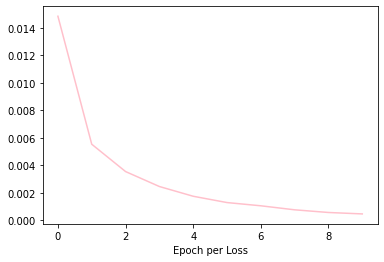

In [26]:
import matplotlib.pyplot as plt
import matplotlib

fig=plt.figure()
plt.plot(range(epoch),epoch_loss,label='Loss',color='Pink')
plt.xlabel('Epoch per Loss')
plt.show()


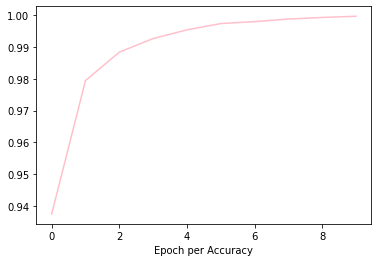

In [27]:
fig=plt.figure()
plt.plot(range(epoch),epoch_acc,label='Accuracy',color='pink')
plt.xlabel('Epoch per Accuracy')
plt.show()

In [30]:
preds=test(model,x_test,batch)
len(preds)

28000

In [0]:
submissions=pd.DataFrame({'ImageId':list(range(1,len(preds)+1)),
                         "Label":preds})
submissions.to_csv("uni_mnist.csv",index=False,header=True)